# **Hope-to-Skill Free AI Course**
## **Standard (Fully Connected) Neural Network**

You will Learn the following
1. Loading dataset
2. Preprocessing the dataset
3. Defination of Neural Network
4. Training a Neural Network
5. Testing a Neural Network

We will work on fashion Mnist dataset for this project.
We will use ANN and try push it as far as possible

## **Loading Required packages and Data**

In [17]:
# Importing necessay libraries for the project
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from time import time



## **Data Splitting**

In [18]:
# Loading the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
# splitting the data into train and test set
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

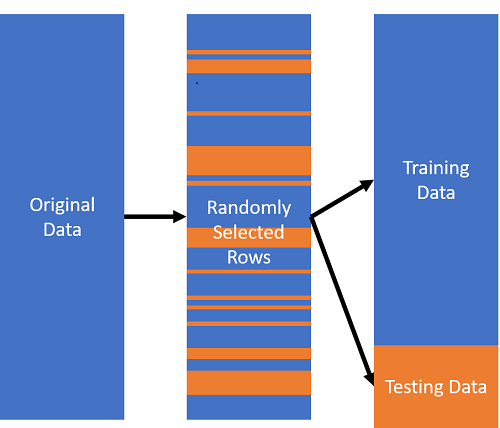


## **Dataset Display**

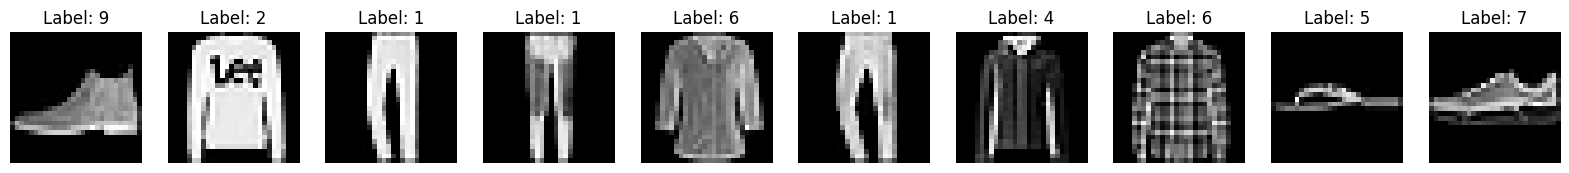

In [19]:
# Number of images to display
n = 10

# Creating a figure to display the images
plt.figure(figsize=(20, 4))

# Looping through the first 'n' images
for i in range(n):
    # Creating a subplot within the figure
    ax = plt.subplot(2, n, i + 1)

    # Displaying the original image
    plt.imshow(X_test[i].reshape(28, 28))
    plt.title("Label: {}".format(Y_test[i]))
    plt.axis('off')

    # Setting colormap to grayscale
    plt.gray()

    # Hiding x-axis and y-axis labels and ticks
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Showing the figure with the images
plt.show()

# Closing the figure
plt.close()

In [20]:
# Making a flip copy of the data to make augmented data
X_train_flipped = np.array([np.fliplr(image) for image in X_train])
X_test_flipped = np.array([np.fliplr(image) for image in X_test])

# Making 20 degree rotated copy of the data

# Adding the augmented data to the actual data
X_train = np.concatenate((X_train, X_train_flipped), axis=0)
X_test = np.concatenate((X_test, X_test_flipped), axis=0)
Y_train = np.concatenate((Y_train, Y_train), axis=0)
Y_test = np.concatenate((Y_test, Y_test), axis=0)

In [21]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((120000, 28, 28), (20000, 28, 28), (120000,), (20000,))

**Flattening the Images**

In [22]:
# Print the shapes of the original training data and labels
print("Previous X_train shape: {} \nPrevious X_test shape:{}".format(X_train.shape, X_test.shape))

# Reshape training and testing data to a flat format (flattening the images)
X_train = X_train.reshape(120000, 28*28)
X_test = X_test.reshape(20000, 28*28)
print('Reshaped shape of X_train: {} \nReshaped shape of X_test:{}'.format(X_train.shape, X_test.shape))

Previous X_train shape: (120000, 28, 28) 
Previous X_test shape:(20000, 28, 28)
Reshaped shape of X_train: (120000, 784) 
Reshaped shape of X_test:(20000, 784)


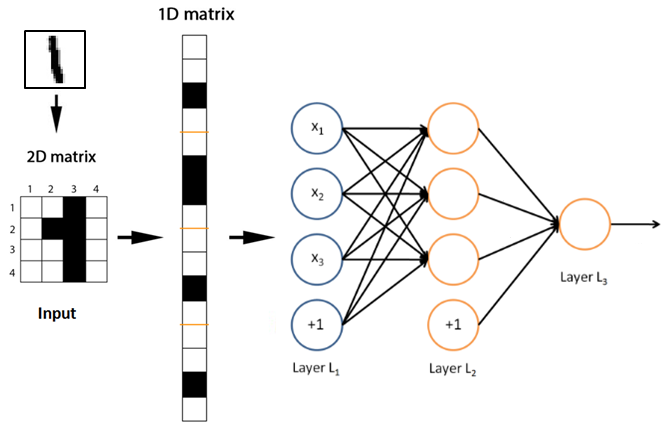



## **Min-Max Scalling**

In [23]:
# Convert the data type of the images to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize the pixel values to a range between 0 and 1  # Zero is for Black  #1 for White
X_train /= 255
X_test /= 255

## **Processing the Target variable**

In [24]:
# Number of classes in the dataset
classes = 10
# Convert the labels to one-hot encoded format
Y_train = to_categorical(Y_train, classes)
Y_test = to_categorical(Y_test, classes)

# Print the shapes of the preprocessed training data and labels
print("New X_train shape: {} \nNew Y_train shape:{}".format(Y_train.shape, Y_test.shape))

New X_train shape: (120000, 10) 
New Y_train shape:(20000, 10)


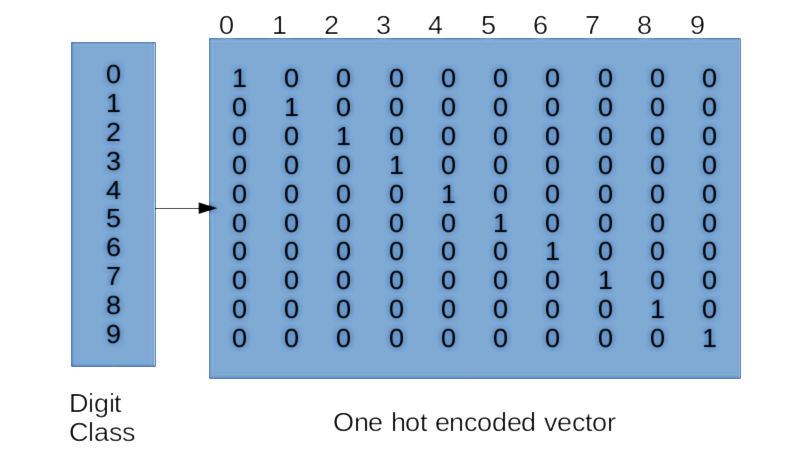

## **Setting up Hyper-parameters**

In [25]:
# Define the input size for each data sample (e.g., image pixels)
input_size = X_train.shape[1]

# Specify the number of data samples to process in each batch
batch_size = 60

# Define the number of neurons in the first hidden layer
hidden1 = 1000

# Define the number of neurons in the second hidden layer
hidden2 = 500

# Define the number of neurons in the third hidden layer
hidden3 = 200

# Define the number of neurons in the fourth hidden layer
hidden4 = 20

# Define the total number of classes/categories in the dataset
classes = 10

# Set the number of complete passes through the dataset during training
epochs = 200


## **Building the FCN Model**

In [26]:
### 4. Build the model ###

# Create a Sequential model, which allows us to build a neural network layer by layer
model = Sequential()

model.add(Dense(hidden1, input_dim=input_size, activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(Dense(hidden2, activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(Dense(hidden3, activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(Dense(hidden4, activation='relu'))

model.add(Dense(classes, activation='softmax'))


# Compile the model by specifying the loss function, optimizer, and evaluation metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001))

# Display a summary of the model architecture, showing the layers and parameter counts
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1000)              785000    
                                                                 
 batch_normalization_3 (Bat  (None, 1000)              4000      
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 1000)              0         
                                                                 
 dense_6 (Dense)             (None, 500)               500500    
                                                                 
 batch_normalization_4 (Bat  (None, 500)               2000      
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 500)              

## **Parameters Calculations**
**output = relu(dot(W, input) + bias)**


(400*784) + 400 = 314000 = 0.3 million paramters


**parameters for Chat-gpt 4 = 1760000000000 = 1.76 trillion parameters**

## **Training The Model**

In [27]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # metric to monitor
    patience=10,  # number of epochs to wait for improvement
    restore_best_weights=True  # restore the best weights
)

In [12]:
# Record the current time to measure training time
tic = time()

# Fit the model on the training data
history = model.fit(X_train, Y_train, validation_split=0.2, batch_size=batch_size, epochs=epochs, verbose=1, callbacks=[early_stopping])

# Record the time after model training
toc = time()

# Calculate and print the time taken for model training
print("Model training took {} secs".format(toc - tic))

Epoch 1/200
1600/1600 [==============================] - 68s 41ms/step - loss: 0.6033 - accuracy: 0.7972 - val_loss: 0.3887 - val_accuracy: 0.8610
Epoch 2/200
1600/1600 [==============================] - 46s 29ms/step - loss: 0.4073 - accuracy: 0.8543 - val_loss: 0.3488 - val_accuracy: 0.8759
Epoch 3/200
1600/1600 [==============================] - 46s 29ms/step - loss: 0.3660 - accuracy: 0.8668 - val_loss: 0.3349 - val_accuracy: 0.8758
Epoch 4/200
1600/1600 [==============================] - 51s 32ms/step - loss: 0.3411 - accuracy: 0.8753 - val_loss: 0.3198 - val_accuracy: 0.8840
Epoch 5/200
1600/1600 [==============================] - 46s 29ms/step - loss: 0.3206 - accuracy: 0.8824 - val_loss: 0.3077 - val_accuracy: 0.8864
Epoch 6/200
1600/1600 [==============================] - 48s 30ms/step - loss: 0.3052 - accuracy: 0.8866 - val_loss: 0.3106 - val_accuracy: 0.8855
Epoch 7/200
1600/1600 [==============================] - 46s 28ms/step - loss: 0.2916 - accuracy: 0.8915 - val_loss: 0

Text(0.5, 1.0, 'Accuracy')

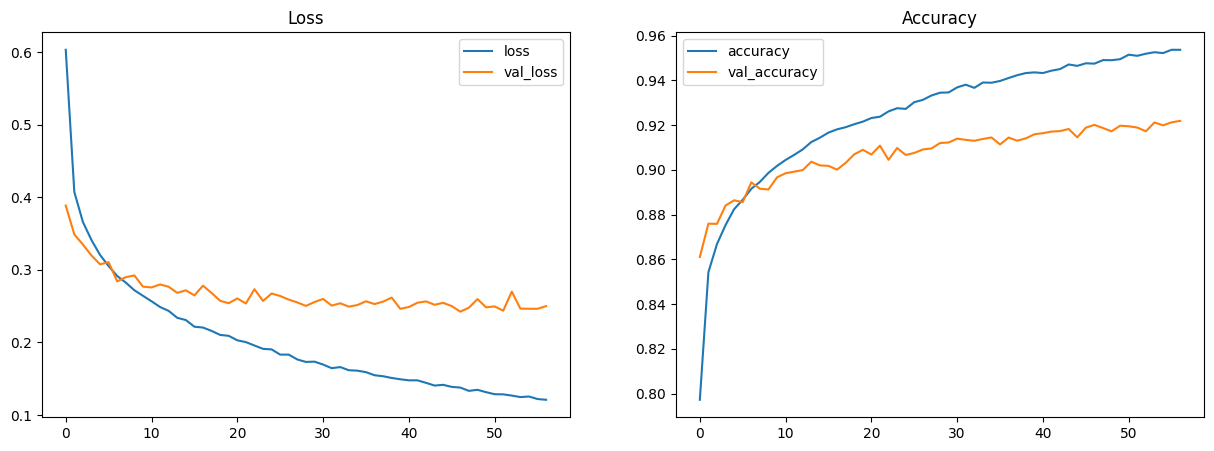

In [13]:
hist_df = pd.DataFrame(history.history)
fig, ax = plt.subplots(1,2, figsize=(15,5))
hist_df[['loss','val_loss']].plot(ax=ax[0])
ax[0].set_title('Loss')
hist_df[['accuracy','val_accuracy']].plot(ax=ax[1])
ax[1].set_title('Accuracy')

## **Testing The Model**

In [14]:
# Import the necessary libraries
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for the test set using the trained model
y_pred_probs = model.predict(X_test, verbose=0)
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

# Calculate and print the test accuracy using predicted and true labels
test_accuracy = accuracy_score(y_pred, Y_test)
print("\nTest accuracy: {}".format(test_accuracy))



Test accuracy: 0.89435


In [15]:
# Define a mask for selecting a range of indices (20 to 49)
mask = range(20, 50)

# Select the first 20 samples from the test set for visualization
X_valid = X_test[20:40]
actual_labels = Y_test[20:40]

# Predict probabilities for the selected validation samples
y_pred_probs_valid = model.predict(X_valid)
y_pred_valid = np.where(y_pred_probs_valid > 0.5, 1, 0)


1/1 [==============================] - 0s 125ms/step


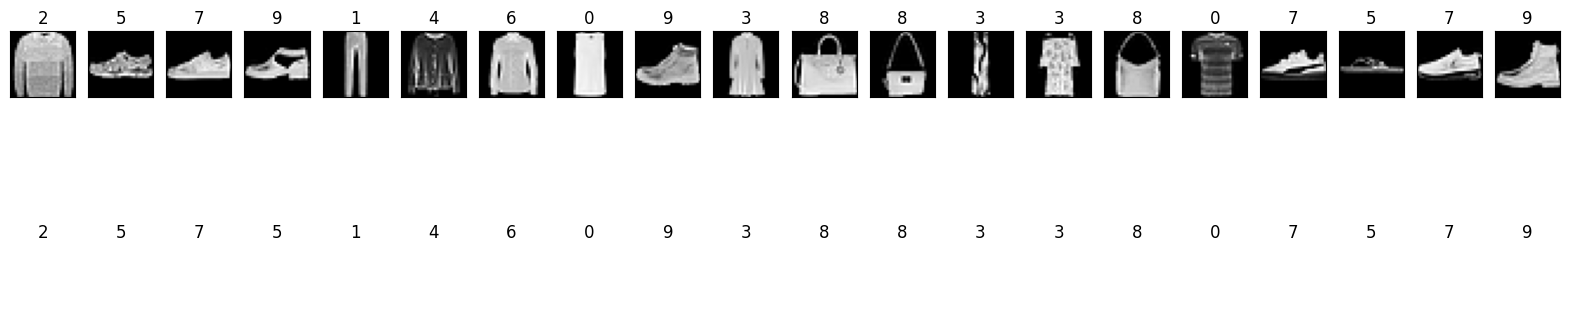

In [16]:
# Set up a figure to display images
n = len(X_valid)
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display the original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_valid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display the actual digit
    actual_digit = np.argmax(actual_labels[i])
    plt.title(actual_digit)

    # Display the predicted digit
    predicted_digit = np.argmax(y_pred_probs_valid[i])
    ax = plt.subplot(2, n, i + 1 + n)
    plt.text(0.5, 0.5, str(predicted_digit), fontsize=12, ha='center', va='center')
    plt.axis('off')

# Show the plotted images
plt.show()

# Close the plot
plt.close()
